In [3]:
from src.utils.Preprocessing import Preprocessing
from src.engine.RNN import EngineRNN
from config import FRAME_SIZE, SAMPLERATE, FRAME_SIZE, HOP, N_MELS, N_MFCC, OUT_DIM, DEVICE
from PodcastDataset import PodcastDataset
from torch.utils.data import DataLoader
from src.utils.utils import plt_losses

# Entrenamiento de mejor modelo (sin augmentation)

In [4]:
preprocessing = Preprocessing(frame_size=FRAME_SIZE,
                  hop = HOP, 
                  n_mels =N_MELS, 
                  n_fft = FRAME_SIZE, 
                  n_mfcc=N_MFCC,
                  samplerate=SAMPLERATE)

In [5]:
model = EngineRNN(input_size = N_MFCC+2,
                         hidden_size = 64,
                         num_rnn_layers = 3,
                         num_mlp_layers = 2,
                         output_size = OUT_DIM, 
                         dropout = 0.2,
                         batch_size = 64,
                         learning_rate = 0.00047,
                         preprocessing = preprocessing)

In [ ]:
%%capture
model.train(epochs=100,patience=20,delta=1e-4,name="bi_gru_def")

# Se carga modelo

In [6]:
model.load_model("bi_gru_def.pth")

c:\Users\sebas\Desktop\DL_señales\T3\src\engine\RNN.py:157: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


# Se evalúa modelo

Evaluación:   0%|          | 0/1200 [00:00<?, ?it/s]

Evaluación: 100%|██████████| 1200/1200 [00:46<00:00, 25.98it/s]


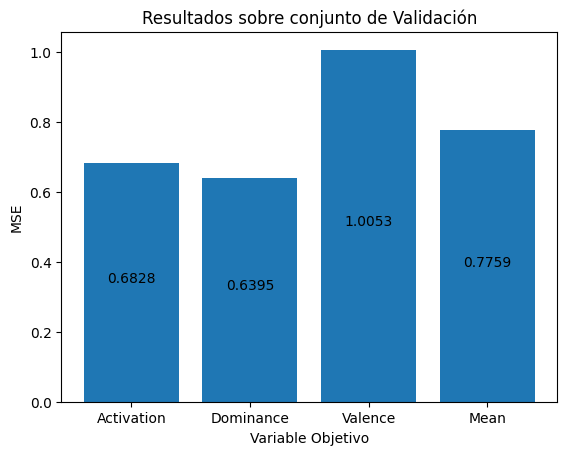

MSE Activation: 0.6827809045565393, MSE dominance: 0.6395399505323562, MSE valence: 1.0052942536787872, MSE mean: 0.7758717029225609


In [50]:
model.evaluate(DataLoader(PodcastDataset(dir="validation",preprocessing = preprocessing),batch_size=1,shuffle=False),"Resultados sobre conjunto de Validación")

Evaluación:   0%|          | 0/600 [00:00<?, ?it/s]

Evaluación: 100%|██████████| 600/600 [00:33<00:00, 17.73it/s]


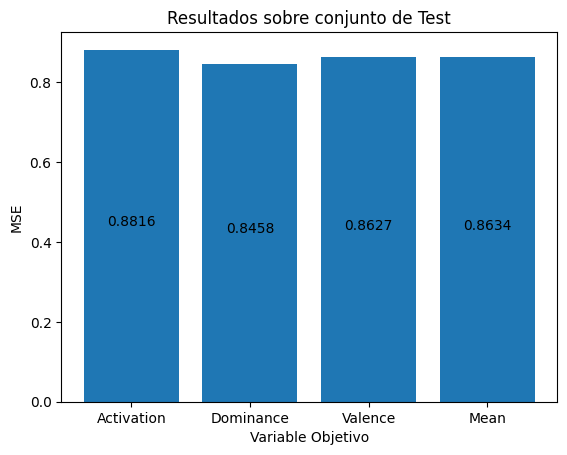

MSE Activation: 0.8816076302646707, MSE dominance: 0.8458035439151371, MSE valence: 0.8627249058247063, MSE mean: 0.8633786933348381


In [7]:
model.evaluate(DataLoader(PodcastDataset(dir="test",preprocessing = preprocessing),batch_size=1,shuffle=False),"Resultados sobre conjunto de Test")

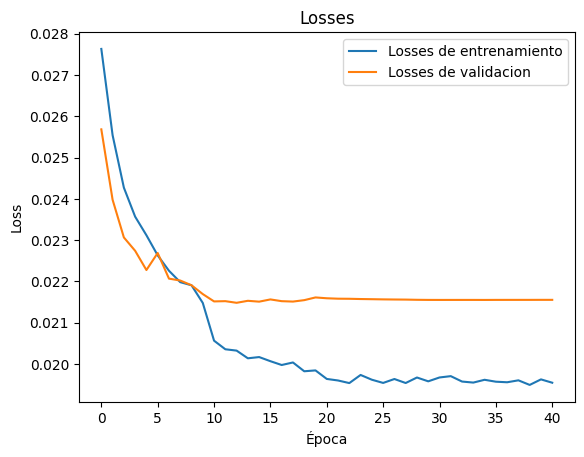

In [8]:
plt_losses("losses/bi_gru_def.csv","Losses")